In [1]:
!uv pip install pandas
!uv pip install seaborn
!uv pip install scikit-learn

Resolved 6 packages in 540ms                                         
Installed 4 packages in 125ms                               
 + numpy==2.2.5
 + pandas==2.2.3
 + pytz==2025.2
 + tzdata==2025.2
Resolved 15 packages in 657ms                                        
Installed 8 packages in 40ms                                
 + contourpy==1.3.2
 + cycler==0.12.1
 + fonttools==4.57.0
 + kiwisolver==1.4.8
 + matplotlib==3.10.1
 + pillow==11.2.1
 + pyparsing==3.2.3
 + seaborn==0.13.2
Resolved 5 packages in 544ms                                         
Installed 4 packages in 83ms                                
 + joblib==1.4.2
 + scikit-learn==1.6.1
 + scipy==1.15.2
 + threadpoolctl==3.6.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression

# Вариант 9
### Data Set - 3(Air Quality Data Set)
### Models: 2(линейная регрессия, LASSO регуляризатор), 3(линейная регрессия, RIDGE регуляризатор)

In [312]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=";", decimal=",",header=0)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [313]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
#Удаление последних строк(в dataset они все NaN)
df = df.dropna(how='all')
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


## 1. Описание набора данных


1. **Дата** (ДД/ММ/ГГГГ)  
2. **Время** (ЧЧ.ММ.СС)  
3. **Истинная усредненная почасовая концентрация CO** (мг/м³, эталонный анализатор)  
4. **Усредненный почасовой отклик датчика PT08.S1** (оксид олова, номинально ориентирован на CO)  
5. **Истинная усредненная почасовая концентрация неметановых углеводородов** (мкг/м³, эталонный анализатор)  
6. **Истинная усредненная почасовая концентрация бензола** (мкг/м³, эталонный анализатор)  
7. **Усредненный почасовой отклик датчика PT08.S2** (титания, номинально ориентирован на НМГК)  
8. **Истинная усредненная почасовая концентрация NOx** (ppb, эталонный анализатор)  
9. **PT08.S3 (оксид вольфрама)** – усредненный почасовой отклик датчика (номинально направлен на NOx)  
10. **Истинная усредненная почасовая концентрация NO₂** (мкг/м³, эталонный анализатор)  
11. **PT08.S4 (оксид вольфрама)** – усредненный почасовой отклик датчика (номинально направлен на NO₂)  
12. **PT08.S5 (оксид индия)** – усредненный почасовой отклик датчика (номинально нацелен на O₃)  
13. **Температура** (°C)  
14. **Относительная влажность** (%)  
15. **Абсолютная влажность (AH)**                                                                                    |

## 2. Проанализируйте колонки в наборе данных и сделайте вывод в какой колонке находится целевое значение

### Целевые переменные (Ground Truth)
Целевыми значениями, которые должна прогнозировать модель, являются **истинные концентрации загрязняющих веществ**, измеренные эталонными анализаторами. Эти колонки обозначены **(GT)**:

- `CO(GT)` — истинная концентрация CO.  
- `NMHC(GT)` — истинная концентрация неметановых углеводородов.  
- `C6H6(GT)` — истинная концентрация бензола.  
- `NOx(GT)` — истинная концентрация оксидов азота.  
- `NO2(GT)` — истинная концентрация диоксида азота.  

### Признаки (сенсорные данные)
Данные с датчиков (`PT08.S1(CO)`, `PT08.S2(NMHC)`, ...) — это **входные признаки**, которые используются для прогнозирования целевых значений.  


- **Колонки с `(GT)`** — эталонные измерения от сертифицированных анализаторов. Это "истинные" значения, которые модель должна предсказывать.  
- **Сенсорные данные** (без суффикса `(GT)`) — показания датчиков, которые могут содержать шумы или погрешности.  

### Выбор целевой переменной
Это завсит от задачи:
- Если модель должна прогнозировать **концентрацию CO**, то целевая колонка — `CO(GT)`.  
- Для других веществ выбираются соответствующие колонки с `(GT)`.

Для лабораторной за **целевую** будет выбрана колонка `CO(GT)`

## 3. Удаление дубликатов строк в наборе

In [315]:
print(f"Размер до удаления дубликатов: {df.shape}")

Размер до удаления дубликатов: (9357, 15)


In [316]:
df = df.drop_duplicates()

In [317]:
print(f"Размер после удаления дубликатов: {df.shape}")


Размер после удаления дубликатов: (9357, 15)


## 4. Удаление выбросов из числовых данных (1.5 * IQR).

#### В наборе данных пропущенные значения помечаются значением -200. Я заменяю их на np.nan

In [445]:
numeric_cols = df.columns[2:]  # исключаем дату/время
numeric_cols

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [319]:
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [320]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [321]:
#Заменяем -200 на NaN
df[numeric_cols] = df[numeric_cols].replace(-200, np.nan)

In [322]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

### Boxplot для 1.5 * IQR

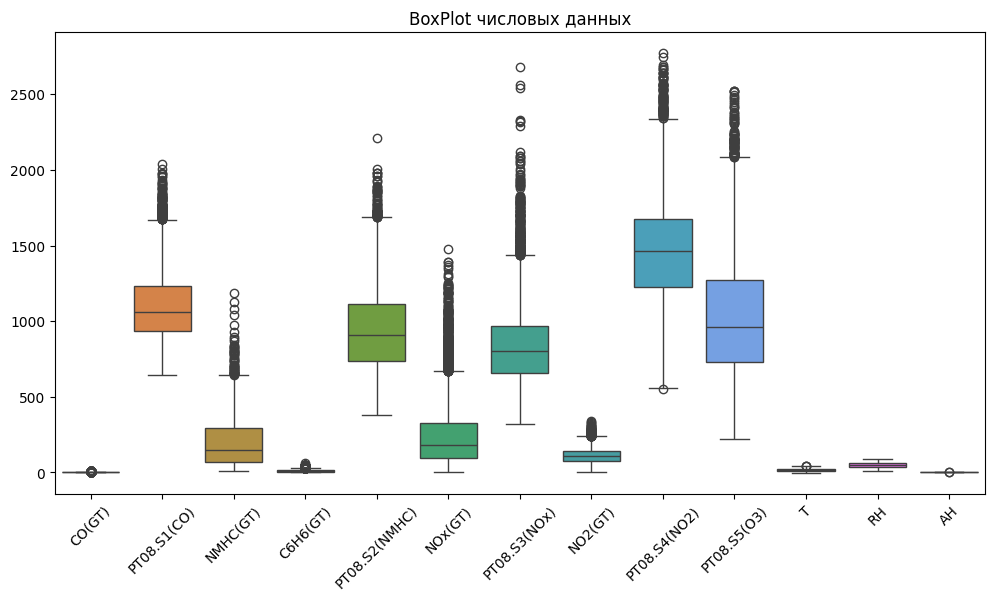

In [323]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("BoxPlot числовых данных")
plt.xticks(rotation=45)
plt.show()

In [324]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned[col] = df_cleaned[col].mask((df_cleaned[col] < lower) | (df_cleaned[col] > upper), np.nan)
    return df_cleaned

In [325]:
df_cleaned = remove_outliers(df, numeric_cols)
df_cleaned

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


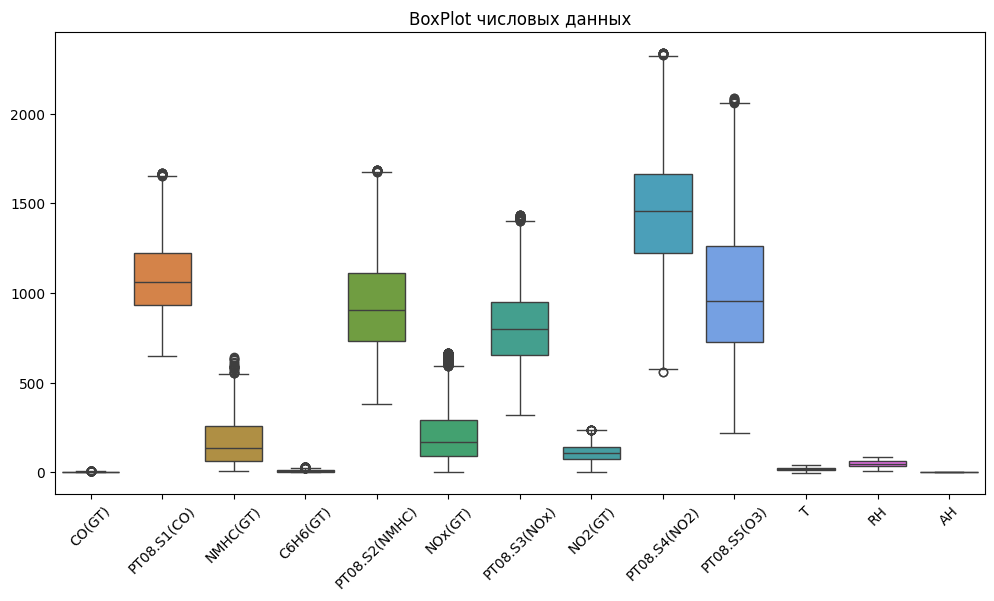

In [326]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title("BoxPlot числовых данных")
plt.xticks(rotation=45)
plt.show()

In [327]:
df_cleaned.isnull().sum()

Date                0
Time                0
CO(GT)           1898
PT08.S1(CO)       484
NMHC(GT)         8498
C6H6(GT)          594
PT08.S2(NMHC)     431
NOx(GT)          2074
PT08.S3(NOx)      607
NO2(GT)          1749
PT08.S4(NO2)      463
PT08.S5(O3)       459
T                 369
RH                366
AH                368
dtype: int64

## 5. Оценка корреляции между числовыми признаками

In [328]:
df_numeric = df.drop(['Date', 'Time'], axis=1)

In [329]:
corr_matrix = df_numeric.corr(method='pearson')

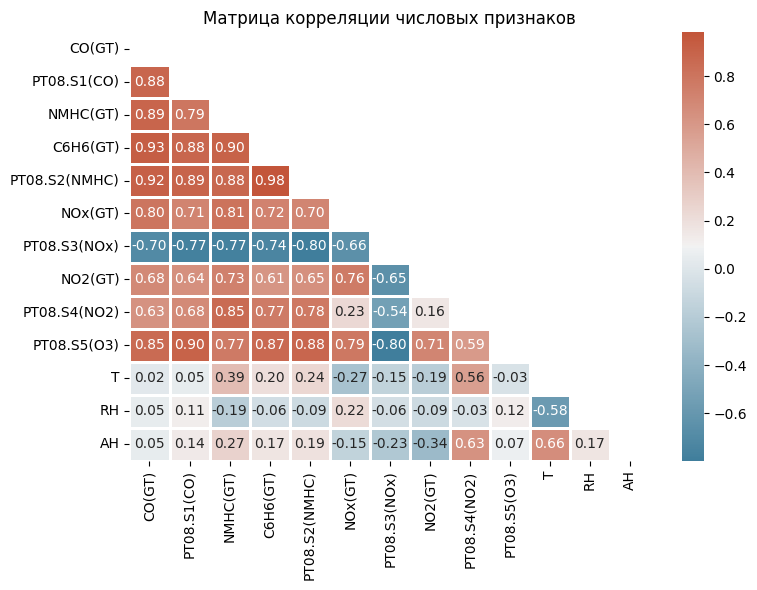

In [330]:
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=1)
plt.title('Матрица корреляции числовых признаков')
plt.tight_layout()
plt.show()

## 6, 7. Проанализируйте колонки на наличие нулевых значений.

In [331]:
nan_stats = pd.DataFrame({
    'NaN count': df.isnull().sum(),
    'precent': df.isnull().sum() / len(df)
})

nan_stats= nan_stats.sort_values(by='NaN count', ascending=False)

print(nan_stats)

               NaN count   precent
NMHC(GT)            8443  0.902319
CO(GT)              1683  0.179865
NO2(GT)             1642  0.175484
NOx(GT)             1639  0.175163
PT08.S1(CO)          366  0.039115
C6H6(GT)             366  0.039115
PT08.S2(NMHC)        366  0.039115
PT08.S3(NOx)         366  0.039115
PT08.S4(NO2)         366  0.039115
PT08.S5(O3)          366  0.039115
T                    366  0.039115
RH                   366  0.039115
AH                   366  0.039115
Date                   0  0.000000
Time                   0  0.000000


#### Самый сильный выбром нулевых значений зафиксирован в NMHC(GT) - 8443
Большинство значений — пропущены (-200) это может быть заниженной или ошибочной заменой. 
Возможно прибор измерения был неисправен

## 8. Удаление столбцов с большим количеством нулевых значений

#### Удалим NMHC(GT) так как 90 процентов значений в нем пропущены

In [332]:
df_cleaned = df.drop(['NMHC(GT)'], axis=1)

#### Заполним значения для оставшихся колонок.

#### Для начала я отформатирую даты для того чтобы pandas мог правильно с ними работать.

In [333]:
# Заменим точки в столбце времени на двоеточия
df_cleaned['Time'] = df_cleaned['Time'].str.replace('.', ':', regex=False)

# Создаем колонку с полной датой и временем
df_cleaned['Datetime'] = pd.to_datetime(df_cleaned['Date'] + ' ' + df_cleaned['Time'], format='%d/%m/%Y %H:%M:%S')

# Устанавливаем индекс
df_cleaned.set_index('Datetime', inplace=True)

df_cleaned = df_cleaned.drop(['Time', 'Date'], axis=1)

In [334]:
df_cleaned

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
2005-04-04 11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
2005-04-04 12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406


#### Визуализации пропусков

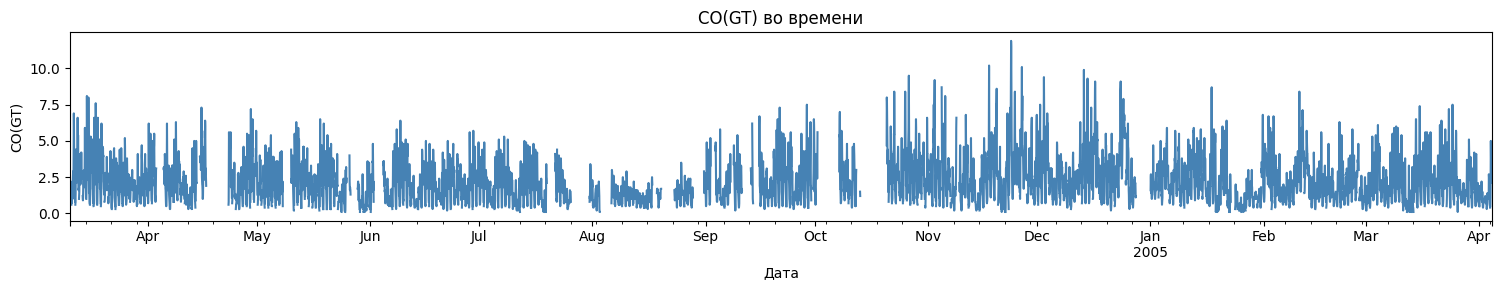

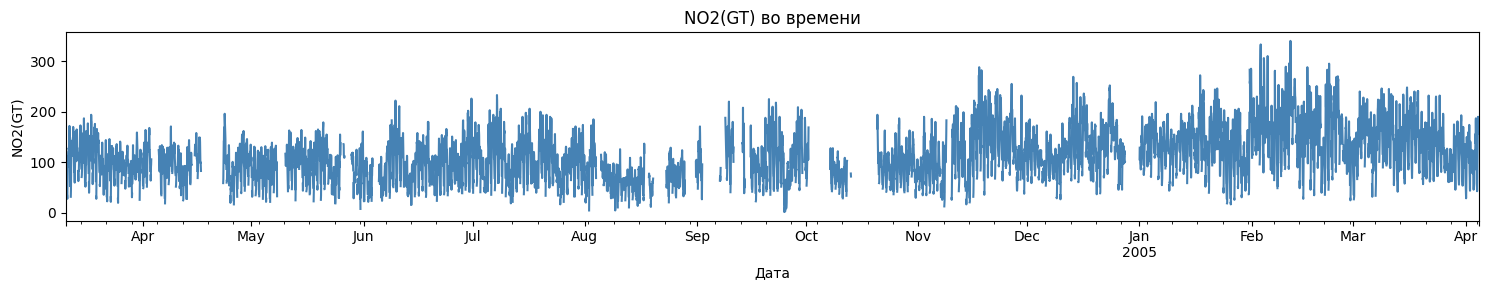

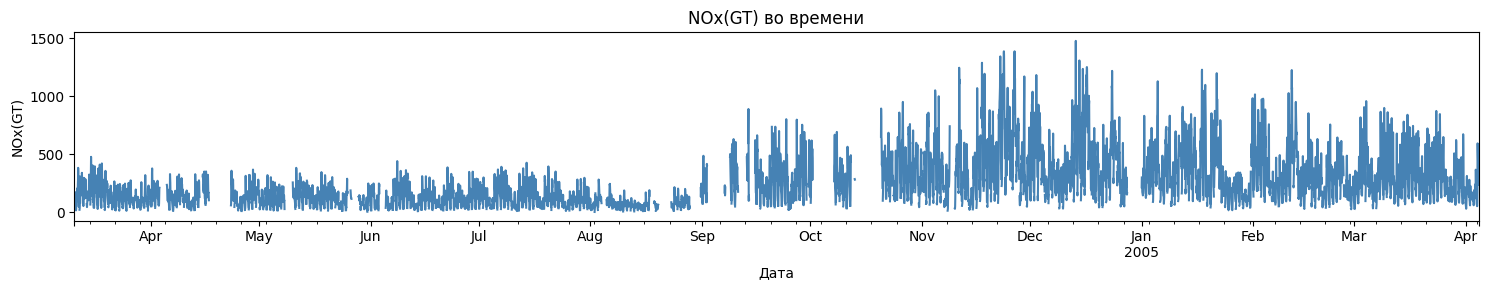

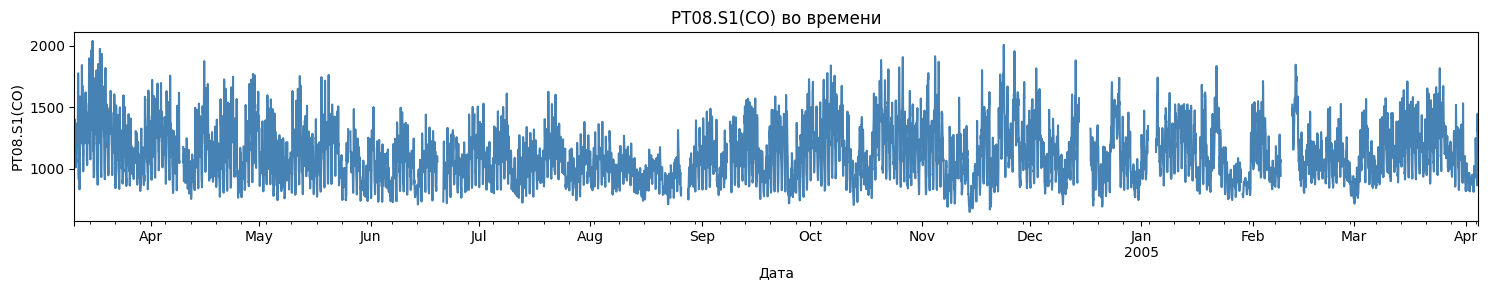

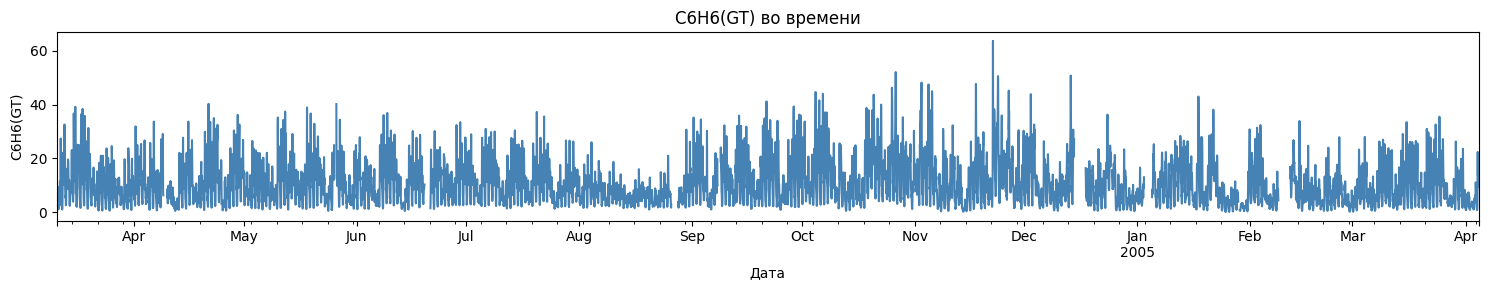

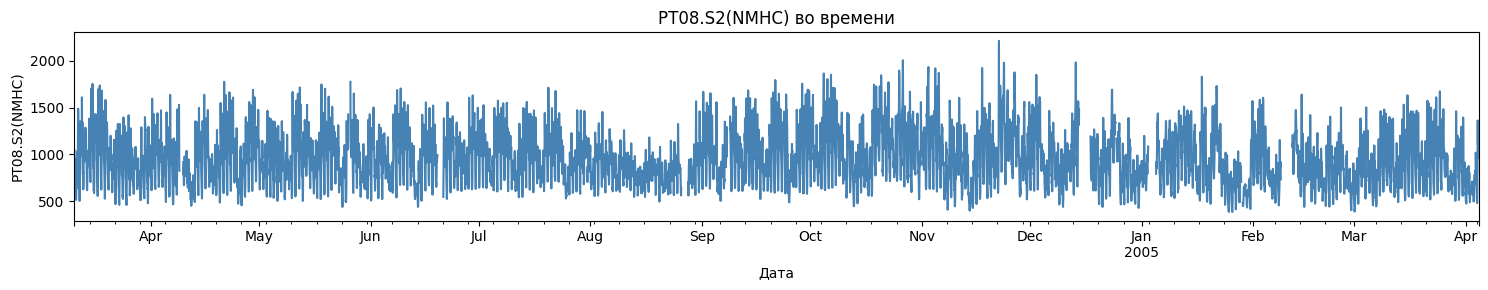

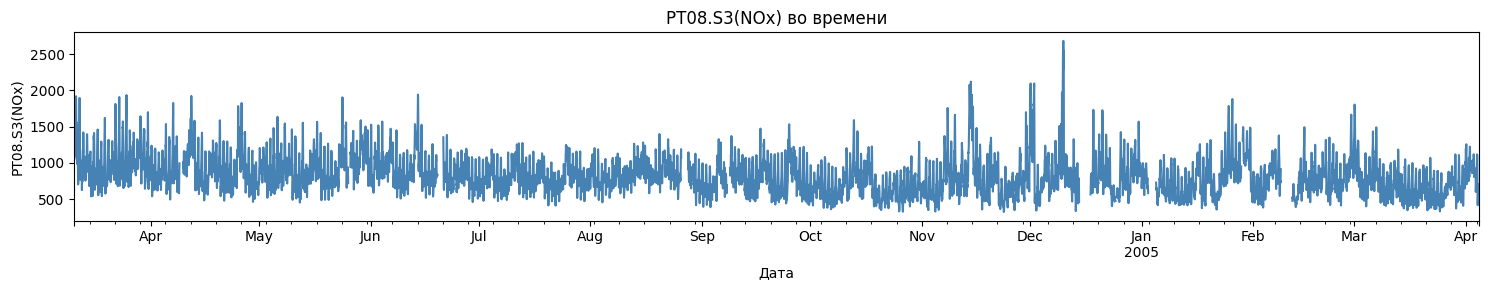

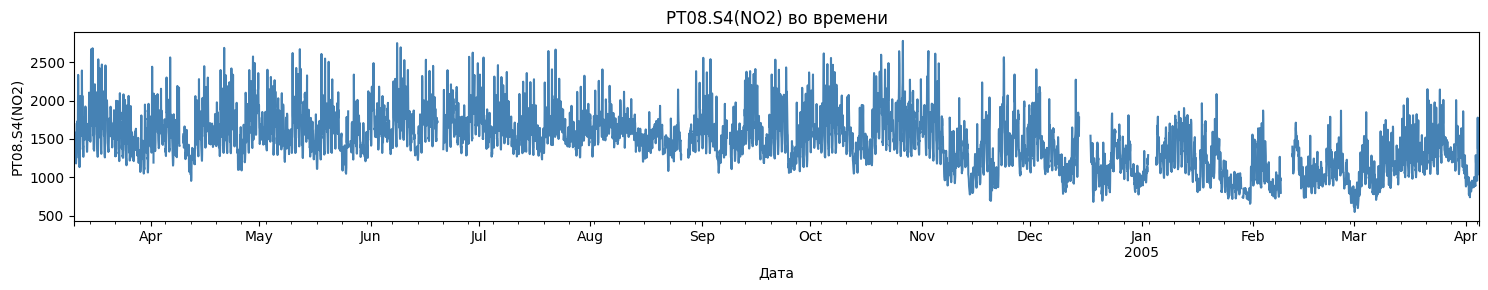

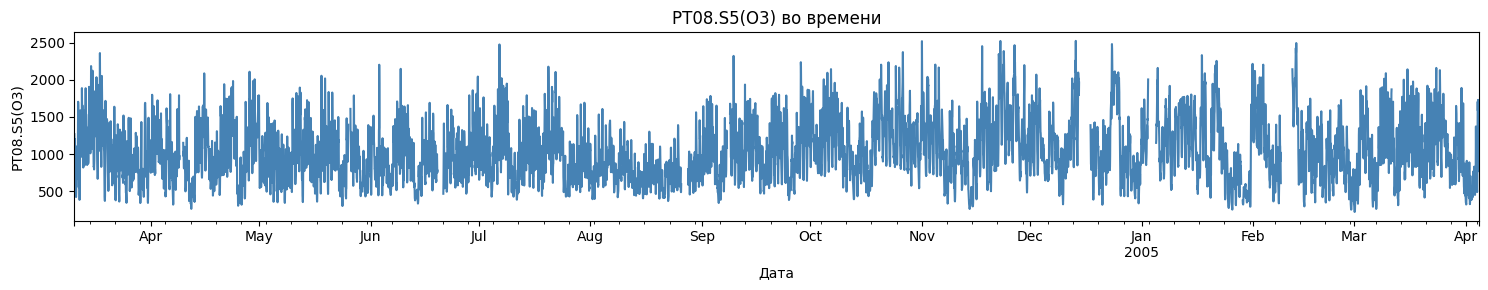

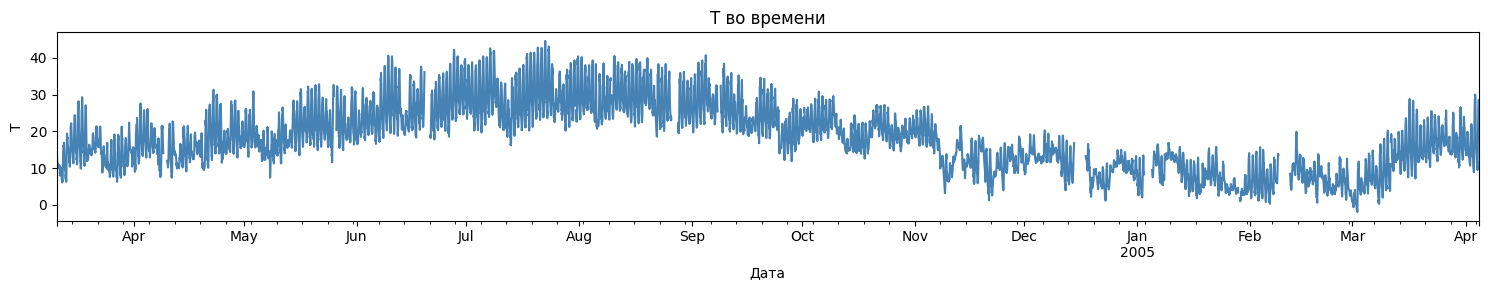

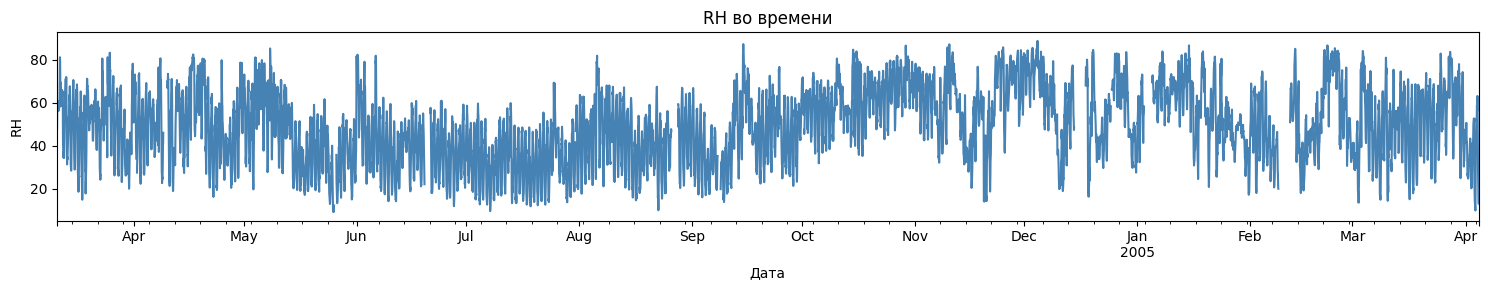

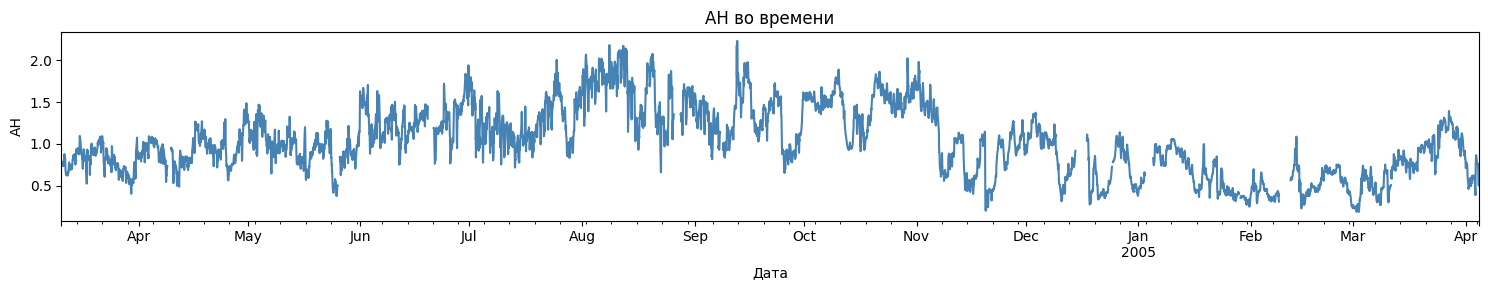

In [335]:
cols_with_missing = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for col in cols_with_missing:
    plt.figure(figsize=(15, 3))
    df_cleaned[col].plot(title=f'{col} во времени', color='steelblue')
    plt.ylabel(col)
    plt.xlabel('Дата')
    plt.tight_layout()
    plt.show()

#### Для заполнения  пропусков буду использовать скользящее окно для медианы (rolling median imputation).

In [336]:
df_cleaned.isnull().sum()

CO(GT)           1683
PT08.S1(CO)       366
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [337]:
window_size = 174

for col in df_cleaned.select_dtypes(include='number').columns:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].rolling(
            window=window_size, 
            center=True, 
            min_periods=1
        ).median())

In [338]:
print(df_cleaned.isnull().sum())

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


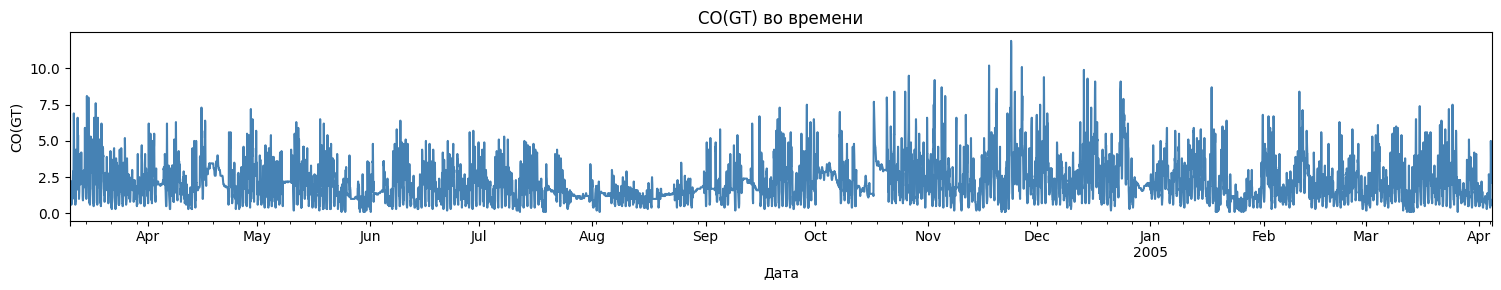

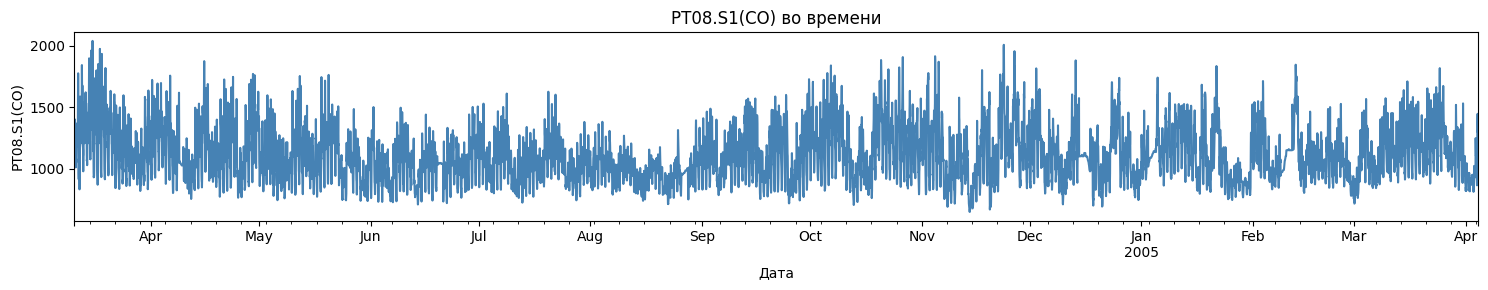

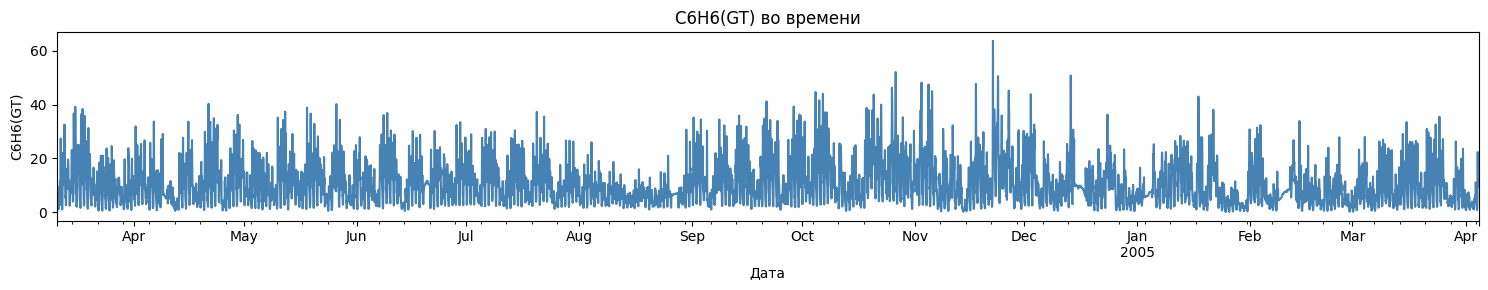

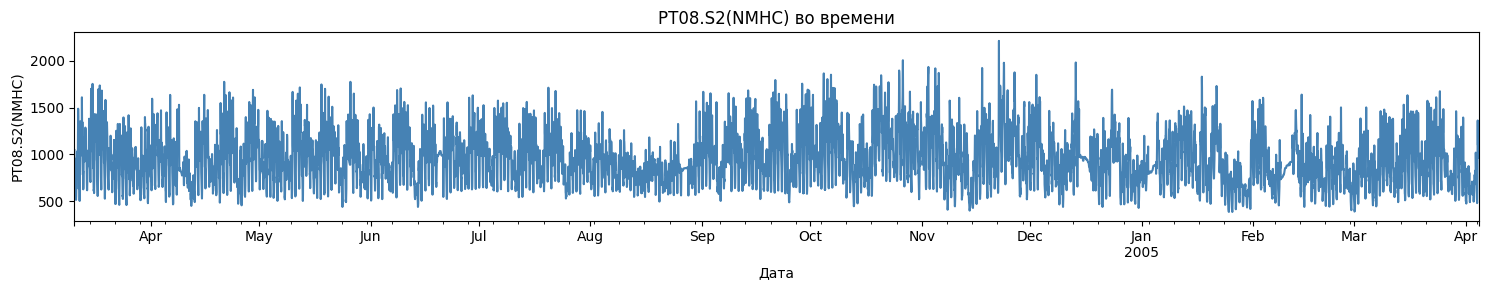

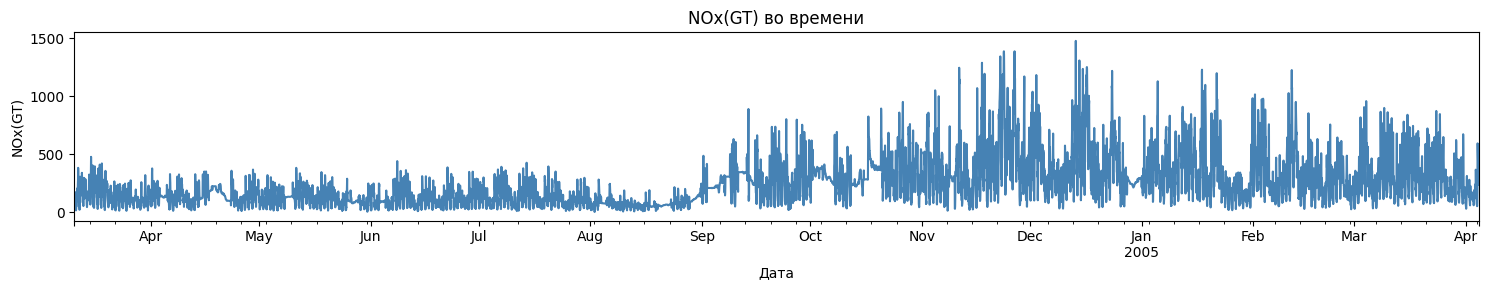

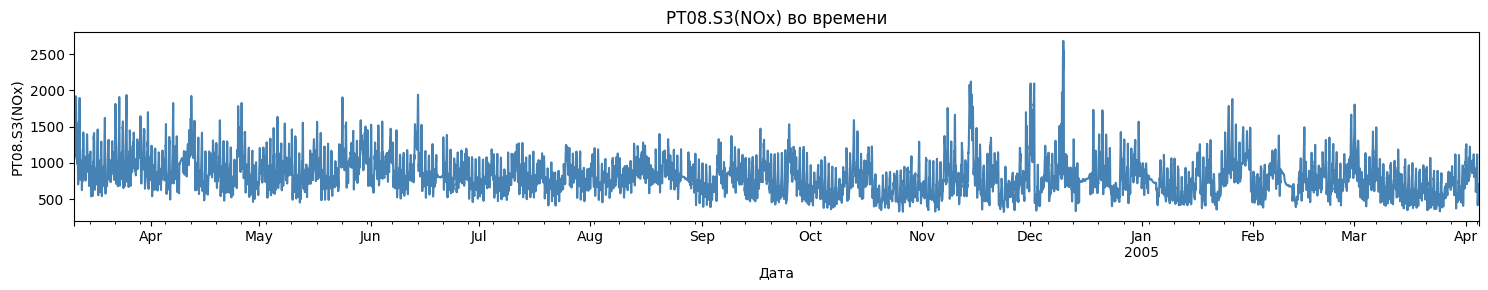

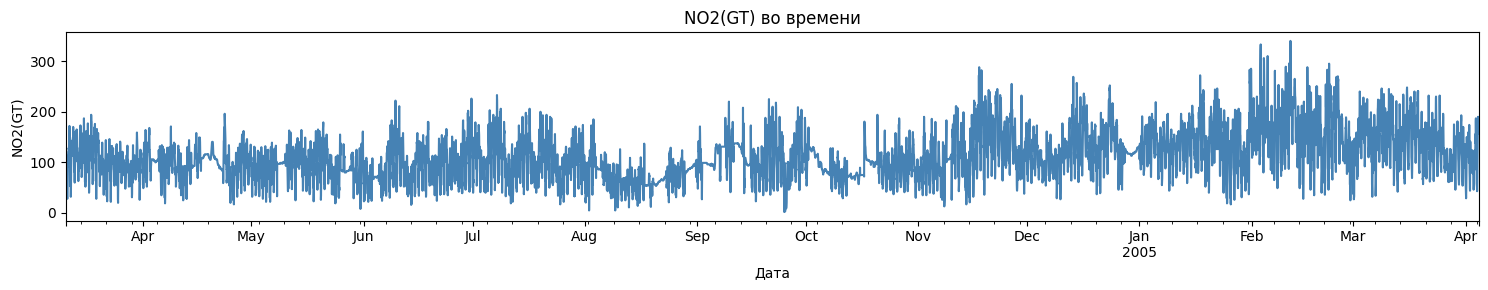

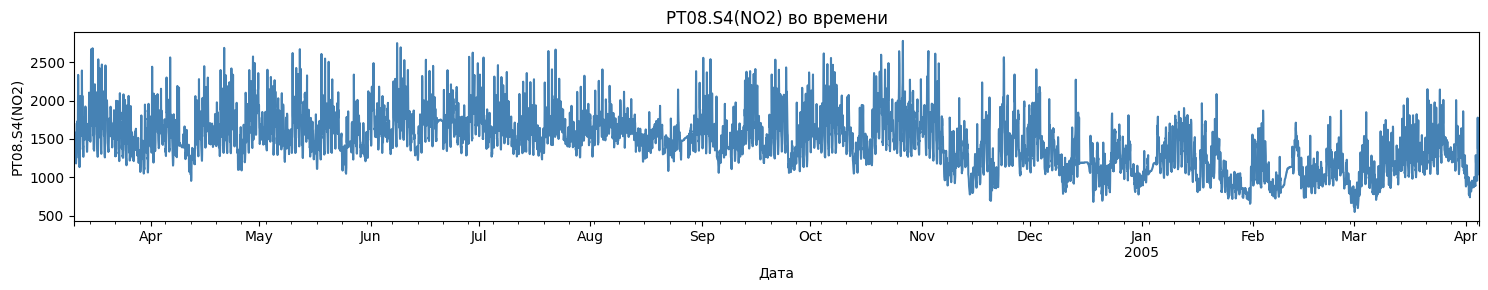

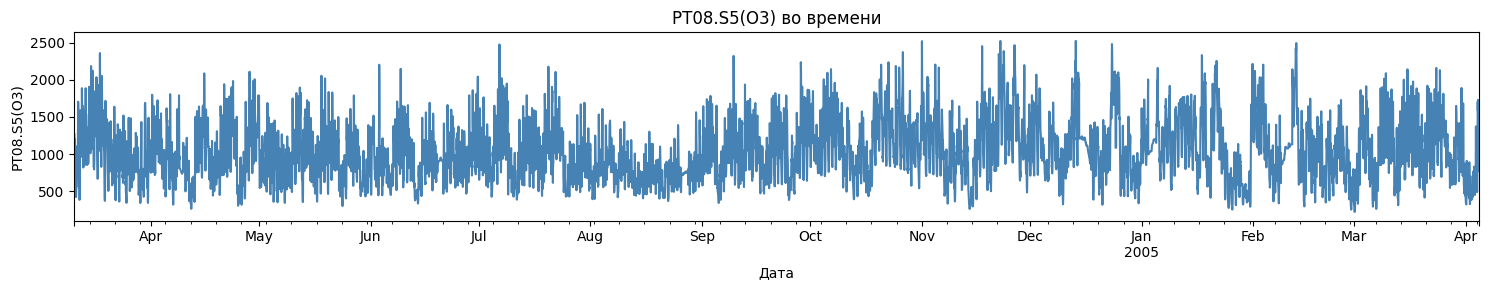

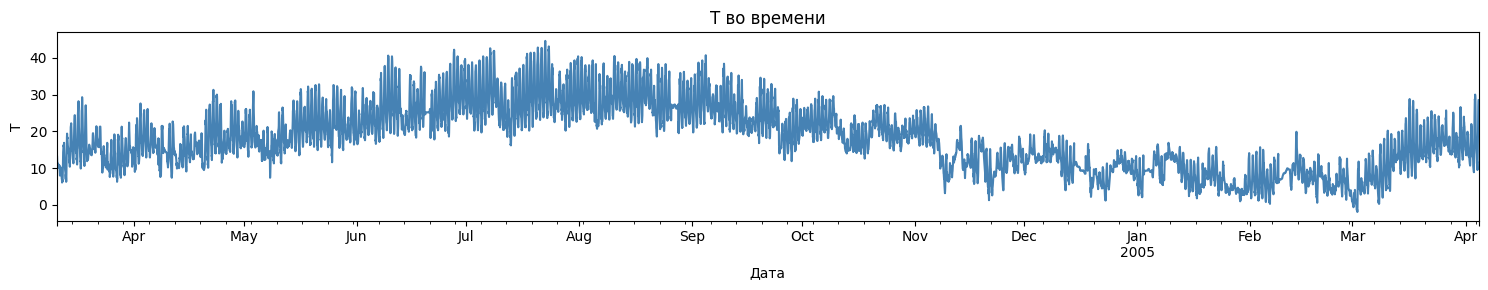

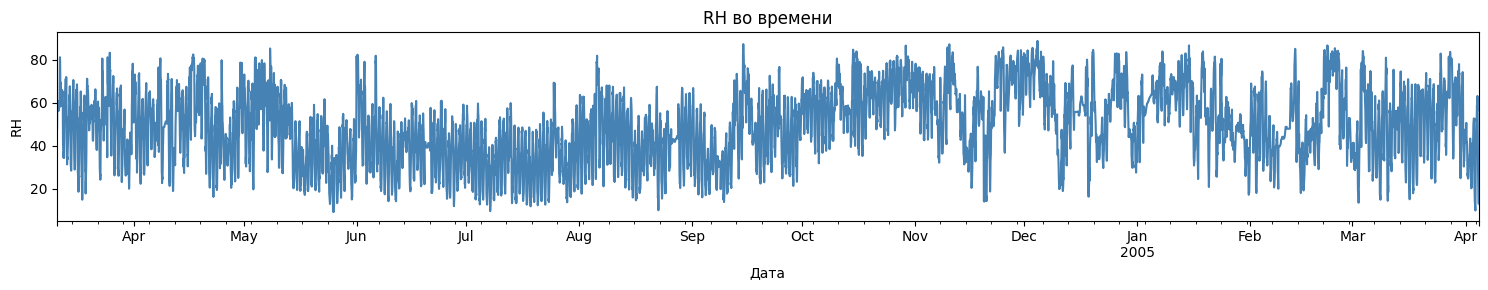

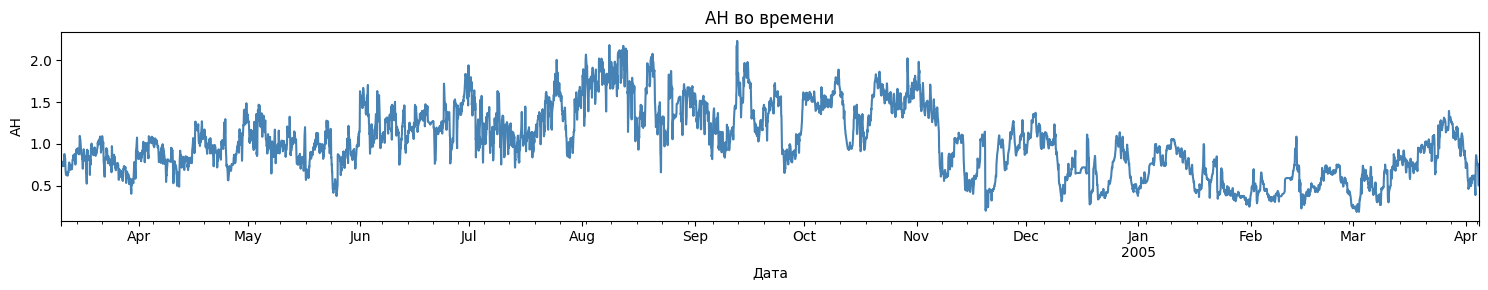

In [339]:
for col in df_rolling.columns:
    plt.figure(figsize=(15, 3))
    df_rolling[col].plot(title=f'{col} во времени', color='steelblue')
    plt.ylabel(col)
    plt.xlabel('Дата')
    plt.tight_layout()
    plt.show()

## 9. Масштабирование количественных (числовых) признаков

#### BoxPlot до масштабирования

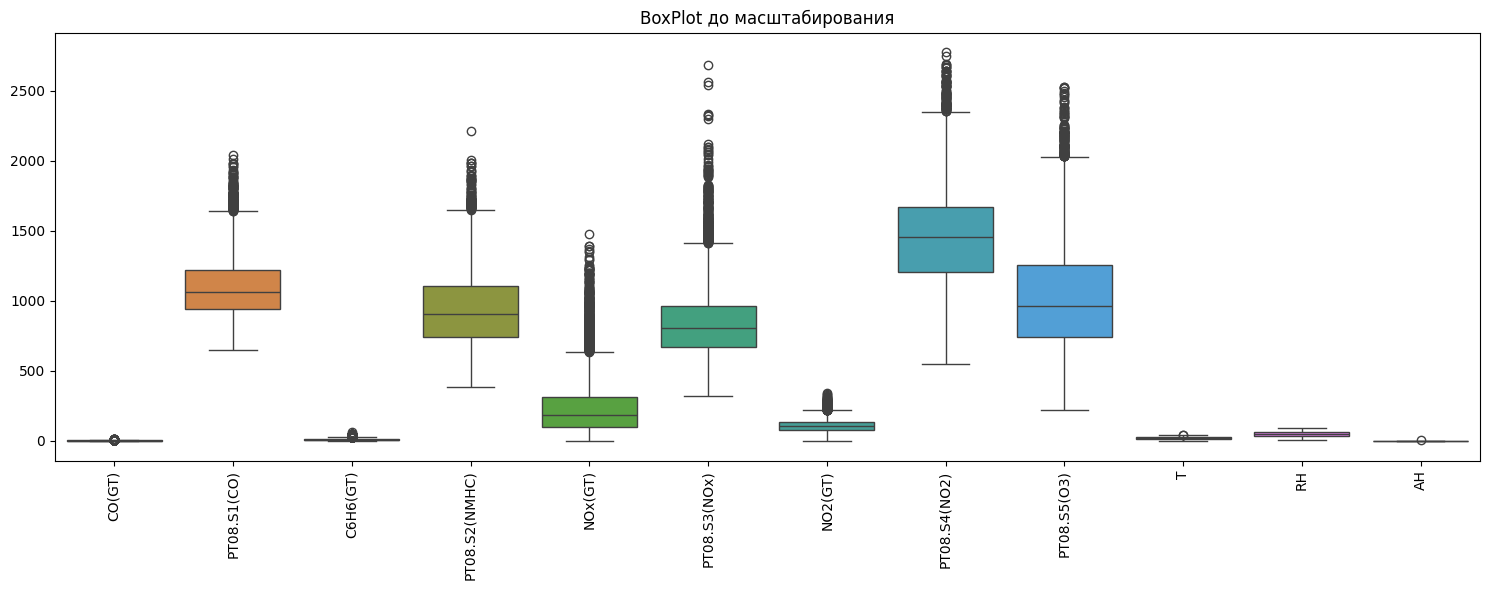

In [340]:
numeric_cols = df_cleaned.select_dtypes(include='number').columns

plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.title('BoxPlot до масштабирования')
plt.xticks(rotation=90)
plt.tight_layout()

In [341]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[numeric_cols])
df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols, index=df_cleaned.index)

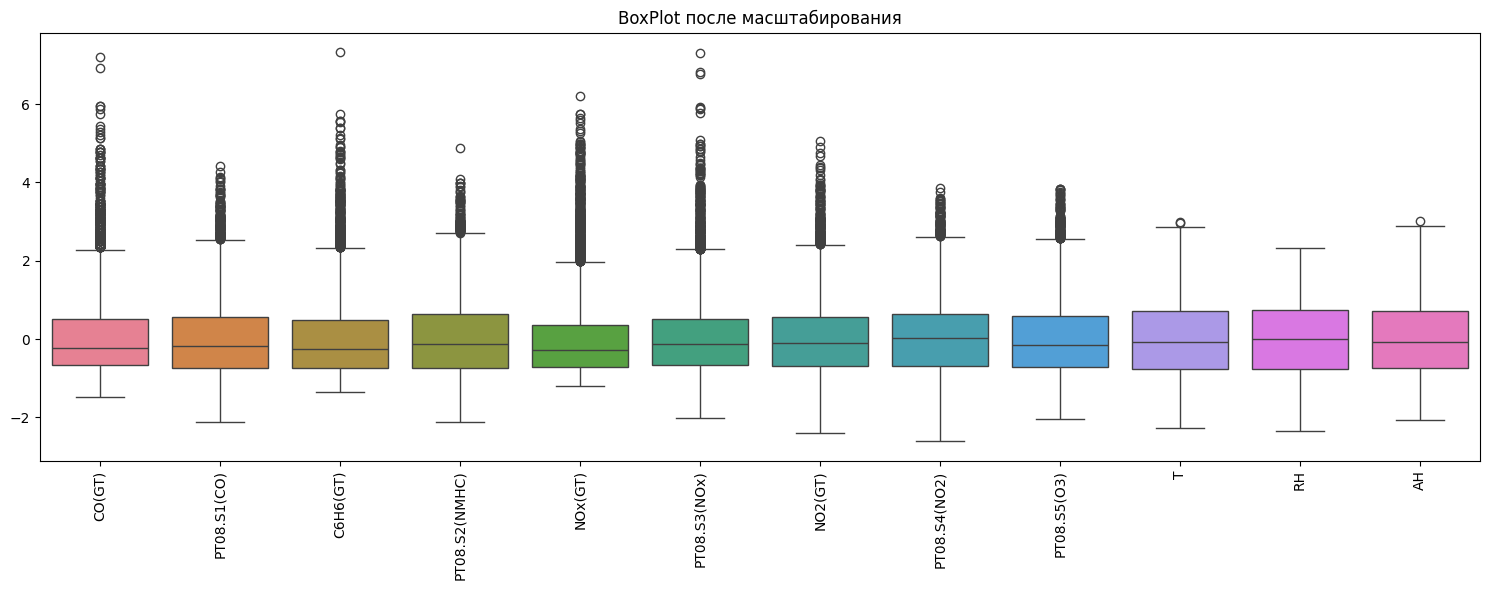

In [343]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_scaled)
plt.title('BoxPlot после масштабирования')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 10. Замена категориальных признаков

In [344]:
df_cleaned.dtypes

CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

#### Все признаки числовые

## 11. Регрессия

#### Я выбрал MSE как метрику, поскольку:
- MSE сильнее штрафует ошибки (в отличие от MAE), что важно при выбросах.
- В задачах мониторинга загрязнения окружающей среды даже единичные пики могут быть критичны.

In [420]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

In [421]:
X = df_scaled.drop(columns=['CO(GT)'])
y = df_scaled['CO(GT)']# Целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 11.1 Регрессия, LASSO регуляризатор;

In [422]:
# Параметры
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

lasso = Lasso()

grid_search = GridSearchCV(
    lasso, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',  #MSE метрика
    refit=True
)

grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
print("Лучшая альфа:", grid_search.best_params_['alpha'])

Лучшая альфа: 0.0001


In [423]:
# Предсказание
y_pred = best_lasso.predict(X_test)

# MAE и MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.3023162734320576
MSE: 0.20236748065571603


#### Коэффициент корреляции (Пирсона и Спирмена) + p-value

In [424]:
from scipy.stats import pearsonr, spearmanr

In [425]:
pearson_corr, pearson_p = pearsonr(y_test, y_pred)
spearman_corr, spearman_p = spearmanr(y_test, y_pred)

print(f"Пирсон: корреляция = {pearson_corr:.3f}, p-value = {pearson_p:.3e}")
print(f"Спирмен: корреляция = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")

Пирсон: корреляция = 0.901, p-value = 0.000e+00
Спирмен: корреляция = 0.868, p-value = 0.000e+00


## 11.2 Регрессия, RIDGE регуляризатор

In [426]:
from sklearn.linear_model import Ridge

In [434]:
ridge_model = Ridge()

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [435]:
grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=params,
    scoring='neg_mean_squared_error',  #MSE метрика
    cv=5,
    refit=True
)

grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
print("Лучшая альфа:", grid_search.best_params_['alpha'])

Лучшая альфа: 10


In [436]:
y_pred_ridge = best_ridge.predict(X_test)

# MAE и MSE
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.30222534682116653
MSE: 0.2025199605177561


#### Коэффициент корреляции (Пирсона и Спирмена) + p-value

In [437]:
pearson_corr, pearson_p = pearsonr(y_test, y_pred_ridge)
spearman_corr, spearman_p = spearmanr(y_test, y_pred_ridge)

print(f"Пирсон: корреляция = {pearson_corr:.3f}, p-value = {pearson_p:.3e}")
print(f"Спирмен: корреляция = {spearman_corr:.3f}, p-value = {spearman_p:.3e}")

Пирсон: корреляция = 0.901, p-value = 0.000e+00
Спирмен: корреляция = 0.868, p-value = 0.000e+00


#### Результаты

| Метрика           | Lasso       | Ridge       |
|--------------------|-------------|-------------|
| **MAE**            | 0.3023      | 0.3022      |
| **MSE**            | 0.2024      | 0.2025      |
| **Корреляция Пирсона** | 0.901       | 0.901       |
| **Корреляция Спирмена** | 0.868       | 0.868       |

Все корреляции демонстрируют статистическую значимость на уровне p < 0.001 (тесты Пирсона и Спирмена), что позволяет отвергнуть нулевую гипотезу об отсутствии связи между предсказанными и фактическими значениями. Малые p-value свидетельствуют о неслучайном характере обнаруженных зависимостей.

#### Графики для визуализации результатов.

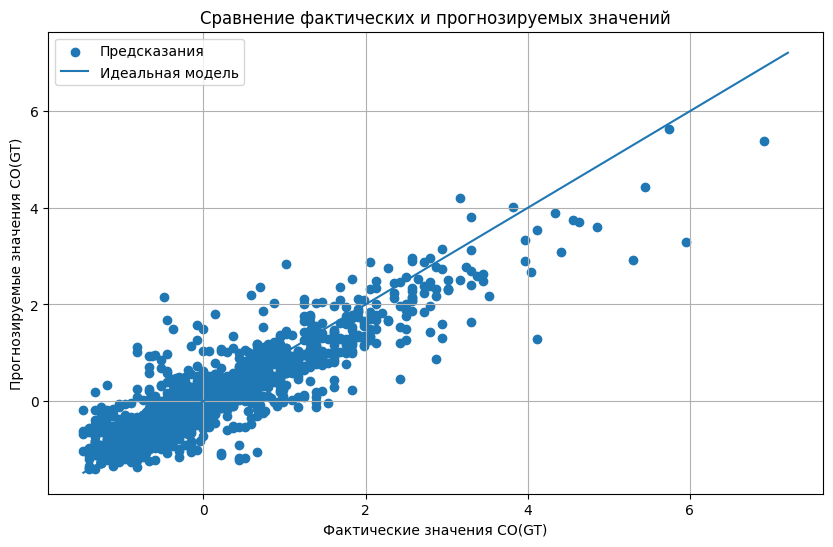

In [442]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, label='Предсказания')
plt.plot([y.min(), y.max()], [y.min(), y.max()], label='Идеальная модель')
plt.xlabel('Фактические значения CO(GT)')
plt.ylabel('Прогнозируемые значения CO(GT)')
plt.title('Сравнение фактических и прогнозируемых значений')
plt.legend()
plt.grid(True)
plt.show()

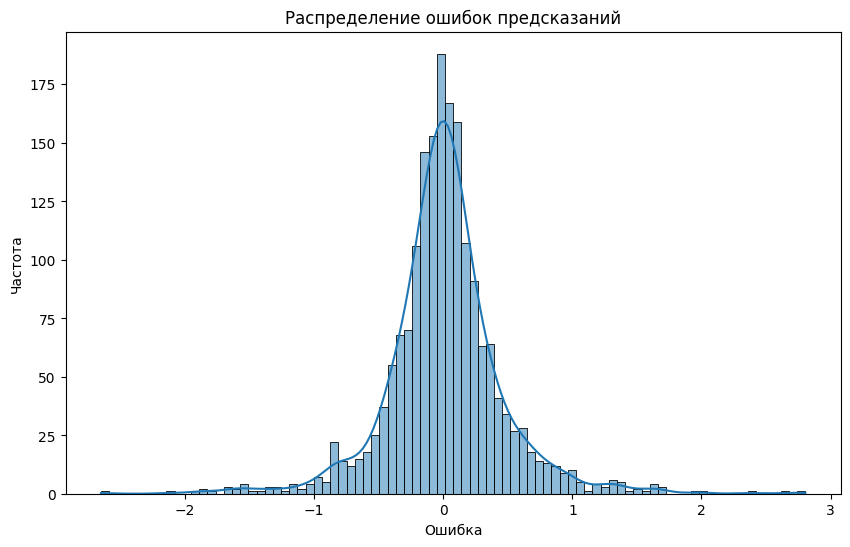

In [443]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.title('Распределение ошибок предсказаний')
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.show()